In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
######################################################################## UTILITY FUNCTIONS ######################################################################################

In [8]:
''' converts from '.csv' file with header to a numpy array'''
def extractData(s):
  data_df = pd.read_csv(s)
  return data_df.to_numpy()

In [9]:
''' returns np vector with values scaled data by the formula : (x-mean)/(standard deviation) '''
def meanScaling(data):
  mean = np.mean(data, axis=0)
  std = np.std(data, axis=0)
    
  return ((data - np.mean(data, axis=0))/std)

In [10]:
'''returns np array with values descaled w.r.t original data'''
def deMeanScaling(data_scaled, data):
  mean = np.mean(data, axis=0)
  std = np.std(data, axis=0)

  return ((data_scaled*std)+mean)

In [11]:
''' return matrix with an added bias row (of all ones) as the first row of the given matrix '''
def addBias(X):
  m = X.shape[0]
  u = np.ones((m,1))
  X = np.append(u, X, axis = 1)
  return X

In [ ]:
#################################################################################################################################################################################

In [12]:
'''Calculates Root Mean Squared Error'''
def rmse(hypothesis, y):
  y.shape = (y.size, 1)
  diff = hypothesis - y
  error = np.sqrt((np.mean(diff**2)))
  return error

In [13]:
'''Adds second degree features to given design matrix'''
def degree2(X):
  m,n = X.shape
  c_X = np.copy(X)
  features = np.hsplit(X, n)
  for i in range(n):
    for j in range(i,n):
      c_X = np.append(c_X, features[i]*features[j], axis = 1)

  return c_X

In [14]:
'''Adds second and third degree features to given design matrix'''
def degree3(X):
  m,n = X.shape
  X_2 = degree2(X)
  features = np.hsplit(X, n)
  for i in range(n):
    for j in range(i,n):
      for k in range(j,n):
        X_2 = np.append(X_2, features[i]*features[j]*features[k], axis=1)

  return X_2

In [20]:
def NNPolynomialTrain(X, y, num_iter, alpha, reg_coeff):

  '''
  X             --> Design matrix of training examples
  y             --> target vector
  num_iter      --> number of iterations
  alpha         --> learning rate
  reg_coeff     --> regularisation coefficient
  '''

  #Adding features and scaling data
  X = degree3(X)
  X = meanScaling(X)
  y = meanScaling(y)

  m = X.shape[0]
  n = [X.shape[1], int(X.shape[1]/2), 1]
  # m --> number of training examples
  # n[0] --> number of units in input layer
  # n[1] --> number of units in hidden layer
  # n[2] --> number of units in output layer

  #Adding bias to design matrix
  X = addBias(X)

  cost = []

  #initializing theta
  theta1 = np.random.randn(n[0]+1, n[1]) * np.sqrt(2.0/(n[0] + n[1])) #- np.sqrt(6.0/(n[0] + n[1]))
  theta2 = np.random.randn(n[1]+1, n[2]) * np.sqrt(2.0/(n[1] + n[2])) #- np.sqrt(6.0/(n[1] + n[2]))

  #training loop
  for i in range(num_iter):

    theta1_reg = theta1
    theta1_reg[0] = np.zeros((1, n[1]))

    theta2_reg = theta2
    theta2_reg = np.zeros((1, n[2]))

    # Foreward propagation
    a1 = X@theta1
    a1 = addBias(a1)

    hypothesis = a1@theta2

    # cost
    cost.append(rmse(hypothesis, y))

    # Backpropagation (grad)
    del3 = hypothesis - y
    del2 = del3@(theta2.T)

    DEL2 = (a1.T)@del3 + reg_coeff*theta2_reg
    DEL1 = (X.T)@del2[:,1:] + reg_coeff*theta1_reg

    # Gradient Decent
    
    theta1 -= alpha*DEL1/m
    theta2 -= alpha*DEL2/m

    print(i, "cost = ", cost[i])

  print(cost[-10:])
  plt.plot(cost)
  
  return theta1, theta2

In [21]:
def NNPolynomialTest(X_test, y_test, y_train, theta1, theta2):

  '''
  X_test   --> Design matrix of features of testing data
  y_test   --> Target value vector of testing data
  y_train  --> Target value vector of trainig data (for descaling)
  theta1   --> parameter for input layer to hidden layer obtained after training
  theta2   --> parameter for hidden layer to output layer obtained after training
  '''

    #Adding features, scaling data and adding bias
    X_test = degree3(X_test)
    X_test = meanScaling(X_test)
    X_test = addBias(X_test)

    # Foreward propagation
    a1 = X_test@theta1
    a1 = addBias(a1)

    hypothesis = deMeanScaling(a1@theta2, y_train)

    
    print('Cost =', rmse(hypothesis, y_test))

    return hypothesis

In [22]:
data_polynomial_train = extractData("/content/drive/MyDrive/WOC/Datasets/Polynomial_train.csv")
data_polynomial_test = extractData("/content/drive/MyDrive/WOC/Datasets/Polynomial_train.csv")

In [23]:
X_polynomial_train = data_polynomial_train[:,:-1]
X_polynomial_test = data_polynomial_test[:,:-1]
y_polynomial_train = data_polynomial_train[:,-1]
y_polynomial_test = data_polynomial_test[:,-1]

0 cost =  1.3614006979680433
1 cost =  0.7321032246662137
2 cost =  0.6004873102125081
3 cost =  0.5179605892574594
4 cost =  0.46195675481939863
5 cost =  0.42156573065244074
6 cost =  0.390645082253785
7 cost =  0.3657540890661106
8 cost =  0.3449421608782491
9 cost =  0.3270578360718831
10 cost =  0.3113805650846003
11 cost =  0.297430642078524
12 cost =  0.2848706978599102
13 cost =  0.2734529623549881
14 cost =  0.2629895153784546
15 cost =  0.2533344298216325
16 cost =  0.24437236927323505
17 cost =  0.23601090206249473
18 cost =  0.22817509214092227
19 cost =  0.22080356727776423
20 cost =  0.21384559302633438
21 cost =  0.20725885755796294
22 cost =  0.20100777312487797
23 cost =  0.19506216069871835
24 cost =  0.18939622306694207
25 cost =  0.18398773751830033
26 cost =  0.1788174171470519
27 cost =  0.17386840255433206
28 cost =  0.16912585499928898
29 cost =  0.16457662890550293
30 cost =  0.1602090067515717
31 cost =  0.1560124832395879
32 cost =  0.1519775885714736
33 cost

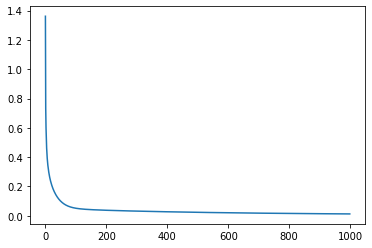

In [24]:
theta1, theta2 = NNPolynomialTrain(X_polynomial_train, y_polynomial_train, 1000, 0.1, 1)

In [25]:
hypothesis = NNPolynomialTest(X_polynomial_test, y_polynomial_test, y_polynomial_train, theta1, theta2)

Cost = 15.392832206746023
